In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drdr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
fake = pd.read_csv(r'C:\Users\Drdr\Desktop\PythonProjects\Fake News Detection\archive (3)/Fake.csv')
true = pd.read_csv(r'C:\Users\Drdr\Desktop\PythonProjects\Fake News Detection\archive (3)/True.csv')
both = pd.read_csv(r'C:\Users\Drdr\Desktop\PythonProjects\Fake News Detection\archive (3)/both.csv')

In [4]:
true['category'] = 1
fake['category'] = 0

In [5]:
df = pd.concat([true,fake])
#Merging the the two datastes, Fake and True together

C:\Users\Drdr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

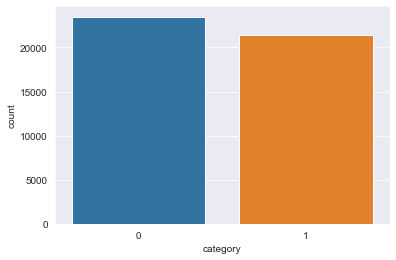

In [6]:
sns.set_style("darkgrid")
sns.countplot(df.category)

In [6]:
df.head()

,title,text,subject,date,label,characters,category,Unnamed: 5
0,Graphic: Supreme Court roundup,,politicsNews,16-Jun-16,0,1,1,NaN
1,White House: Trump speaks with Egypt's Sisi by...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,23-Jan-17,0,152,1,NaN
2,Spain's cabinet to hold special meeting at 170...,MADRID (Reuters) - Spain s cabinet will hold a...,worldnews,31-Oct-17,0,152,1,NaN
3,UK PM May wants to be a strong friend to the EU,"FLORENCE, Italy (Reuters) - Britain wants to b...",worldnews,22-Sep-17,0,156,1,NaN
4,Russia's Putin says we will be able to solve t...,"VLADIVOSTOK, Russia (Reuters) - Russian Presid...",worldnews,07-Sep-17,0,157,1,NaN


In [7]:
df.isna().sum() # Checking for nan Values

title             0
text              0
subject           0
date              0
label             0
characters        0
category          0
Unnamed: 5    44898
dtype: int64

In [8]:
df.title.count()

44898

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'politics'),
 Text(3, 0, 'Government News'),
 Text(4, 0, 'left-news'),
 Text(5, 0, ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"'),
 Text(6, 0, ' decided not to seek re-election. While much of the mainstream media waxed poetic about his 30-year career'),
 Text(7, 0, ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict'),
 Text(8, 0, ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists'),
 Text(9, 0, ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairsto

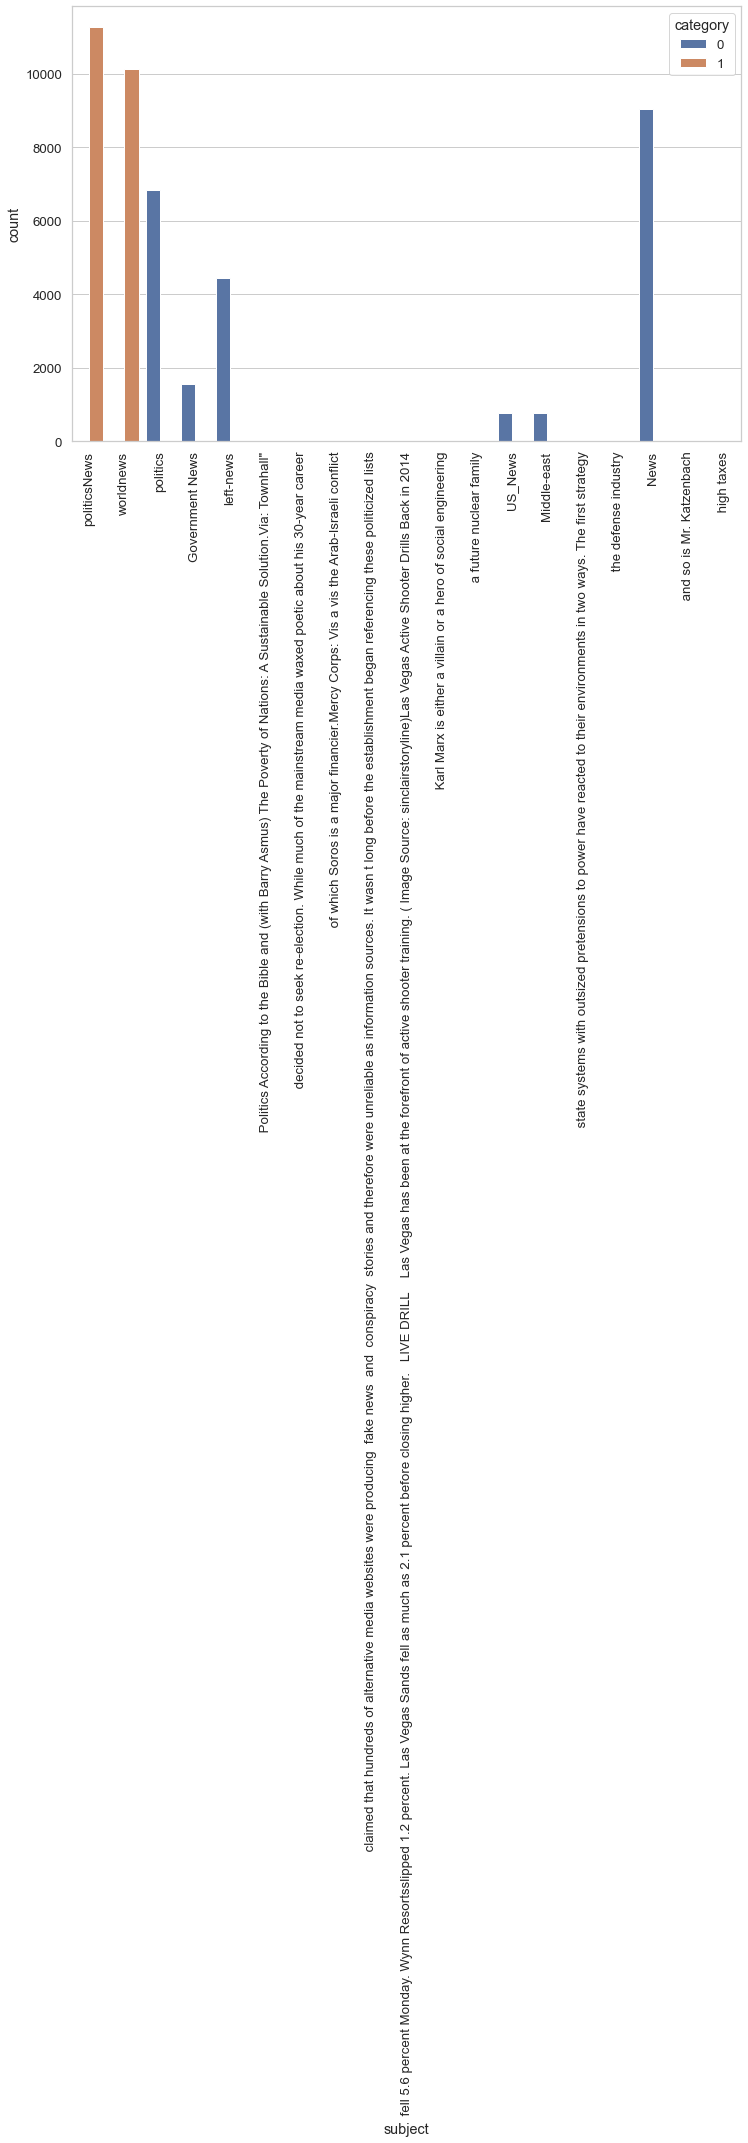

In [69]:
#merging all the data into one column
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'politics'),
 Text(3, 0, 'Government News'),
 Text(4, 0, 'left-news'),
 Text(5, 0, ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"'),
 Text(6, 0, ' decided not to seek re-election. While much of the mainstream media waxed poetic about his 30-year career'),
 Text(7, 0, ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict'),
 Text(8, 0, ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists'),
 Text(9, 0, ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairsto

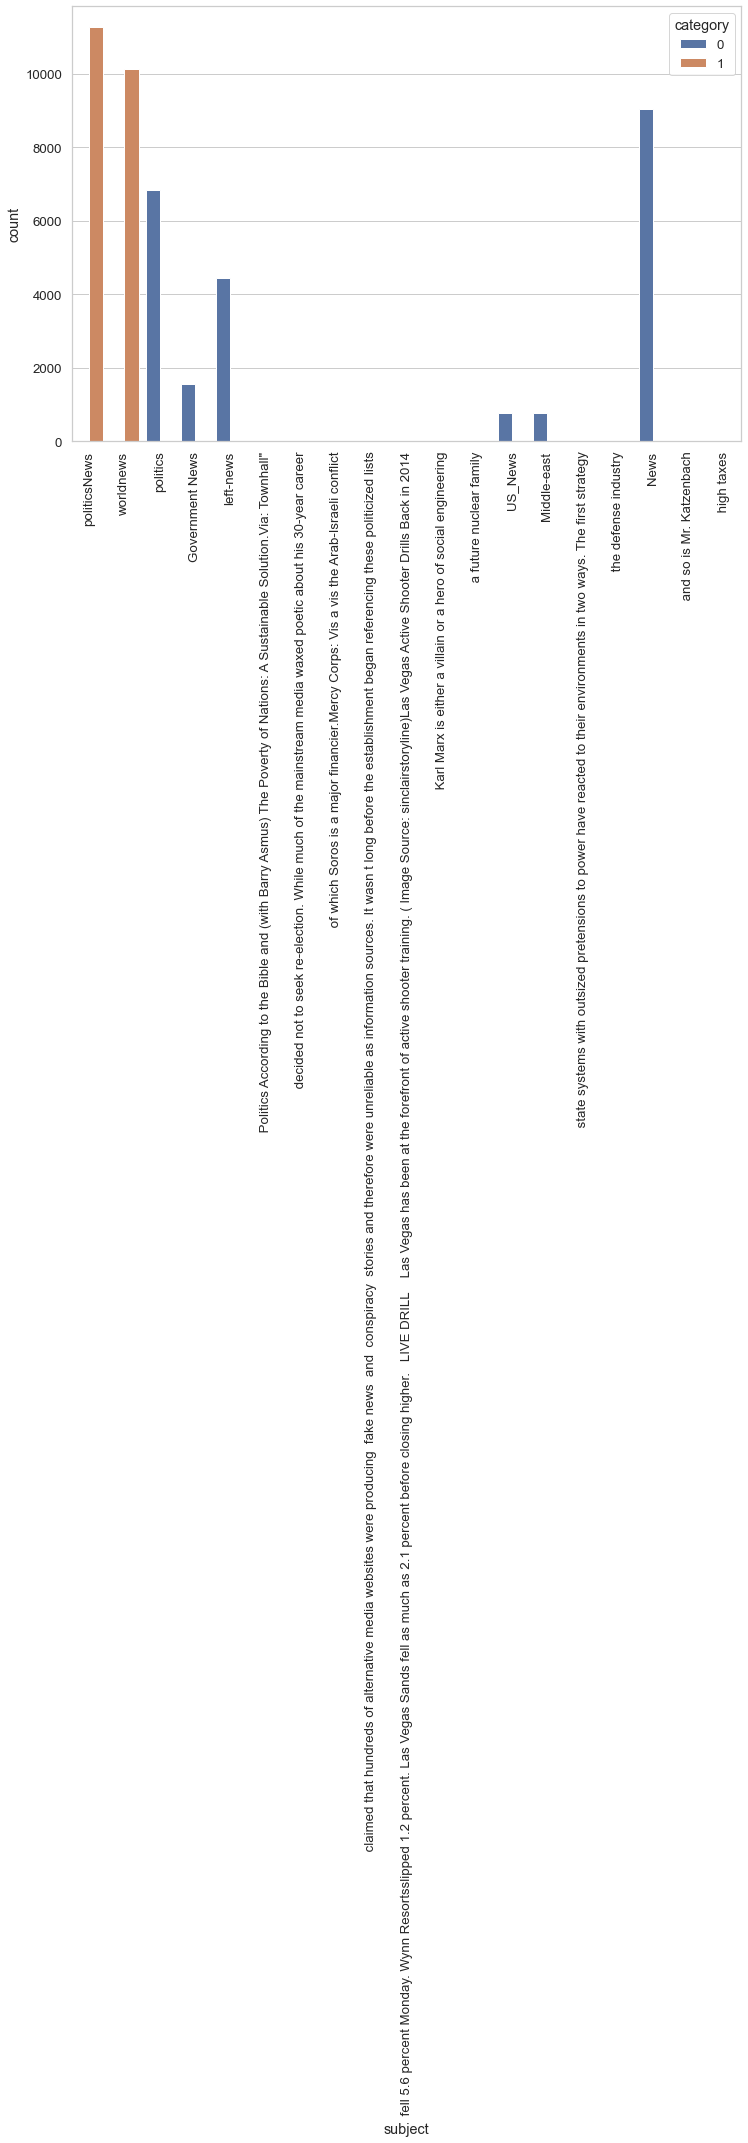

In [70]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [9]:
#Merging df and the third dataset together
df1 = pd.concat([df, both])
df1

,title,text,subject,date,label,characters,category,Unnamed: 5
0,Graphic: Supreme Court roundup,,politicsNews,16-Jun-16,0.0,1.0,1.0,NaN
1,White House: Trump speaks with Egypt's Sisi by...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,23-Jan-17,0.0,152.0,1.0,NaN
2,Spain's cabinet to hold special meeting at 170...,MADRID (Reuters) - Spain s cabinet will hold a...,worldnews,31-Oct-17,0.0,152.0,1.0,NaN
3,UK PM May wants to be a strong friend to the EU,"FLORENCE, Italy (Reuters) - Britain wants to b...",worldnews,22-Sep-17,0.0,156.0,1.0,NaN
4,Russia's Putin says we will be able to solve t...,"VLADIVOSTOK, Russia (Reuters) - Russian Presid...",worldnews,07-Sep-17,0.0,157.0,1.0,NaN
...,...,...,...,...,...,...,...,...
71995,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,NaN,NaN,NaN,NaN,0.0,NaN
71996,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",NaN,NaN,NaN,NaN,1.0,NaN
71997,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,NaN,NaN,NaN,NaN,0.0,NaN
71998,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,NaN,NaN,NaN,NaN,0.0,NaN


In [10]:
del df1['subject']
del df1['date']
df1['text'] = df1['text'] + " " + df1['title']
del df1['title']

In [15]:
nltk.download('words')
words = set(nltk.corpus.words.words())

sent = str(df1)
" ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())
# 'Io to the beach with my'

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Drdr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


'text label \\ 0 Graphic : Supreme Court roundup 0 . 0 1 . 0 1 ( ) - U . S . President T ... 0 . 0 152 . 0 2 ( ) - s cabinet will hold a ... 0 . 0 152 . 0 3 FLORENCE , ( ) - to b ... 0 . 0 156 . 0 4 , Russia ( ) - ... 0 . 0 157 . 0 ... ... ... ... 71995 ( ) - to be ... NaN NaN 71996 You know , because in n ... NaN NaN 71997 Refuse To Leave Train At Refugee Camp ... NaN NaN 71998 CITY ( ) - Trump ’ s ... NaN NaN 71999 For ... NaN NaN category Unnamed : 5 0 1 . 0 NaN 1 1 . 0 NaN 2 1 . 0 NaN 3 1 . 0 NaN 4 1 . 0 NaN ... ... ... 71995 0 . 0 NaN 71996 1 . 0 NaN 71997 0 . 0 NaN 71998 0 . 0 NaN 71999 1 . 0 NaN [ 116898 x 5 ]'

In [12]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

,text,label,characters,category,Unnamed: 5
0,Graphic: Supreme Court roundup,0.0,1.0,1.0,NaN
1,WASHINGTON (Reuters) - U.S. President Donald T...,0.0,152.0,1.0,NaN
2,MADRID (Reuters) - Spain s cabinet will hold a...,0.0,152.0,1.0,NaN
3,"FLORENCE, Italy (Reuters) - Britain wants to b...",0.0,156.0,1.0,NaN
4,"VLADIVOSTOK, Russia (Reuters) - Russian Presid...",0.0,157.0,1.0,NaN
...,...,...,...,...,...
71995,WASHINGTON (Reuters) - Hackers believed to be ...,NaN,NaN,0.0,NaN
71996,"You know, because in fantasyland Republicans n...",NaN,NaN,1.0,NaN
71997,Migrants Refuse To Leave Train At Refugee Camp...,NaN,NaN,0.0,NaN
71998,MEXICO CITY (Reuters) - Donald Trump’s combati...,NaN,NaN,0.0,NaN


In [22]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [23]:
df1['text']= df1['text'].apply(str)
df1['text']=df1['text'].apply(denoise_text)

NameError: name 'stop' is not defined

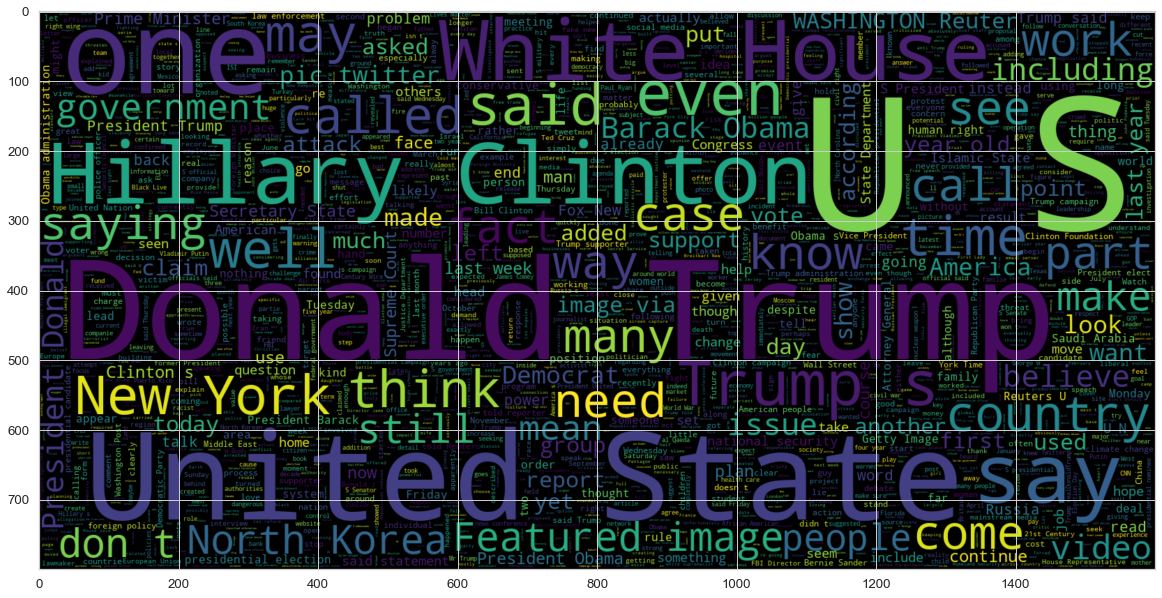

In [76]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df1[df1.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

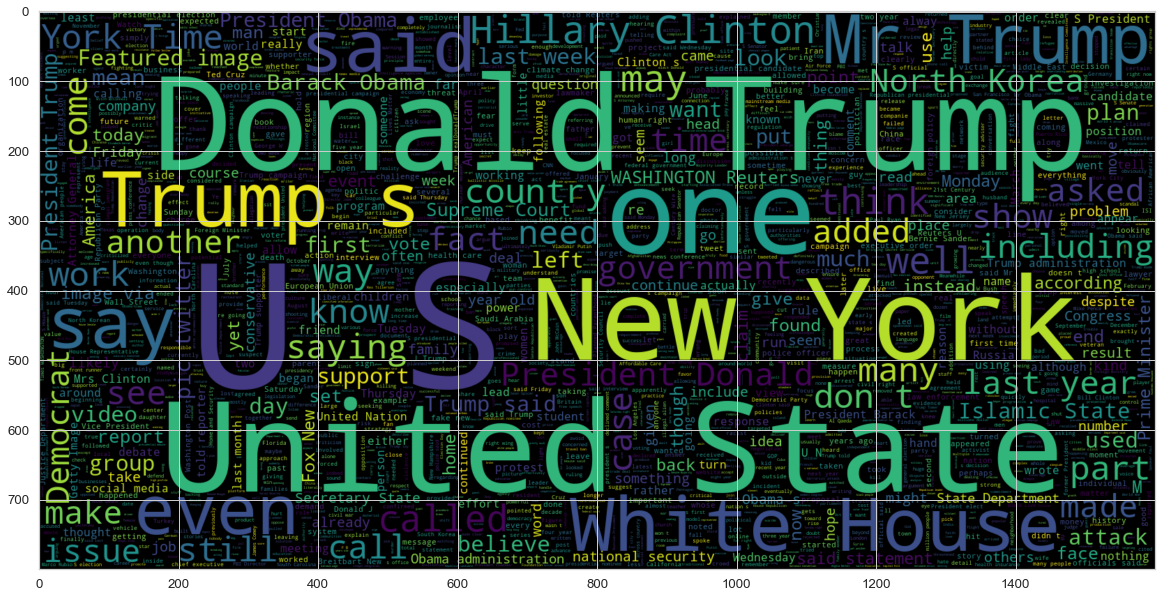

In [77]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df1[df1.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

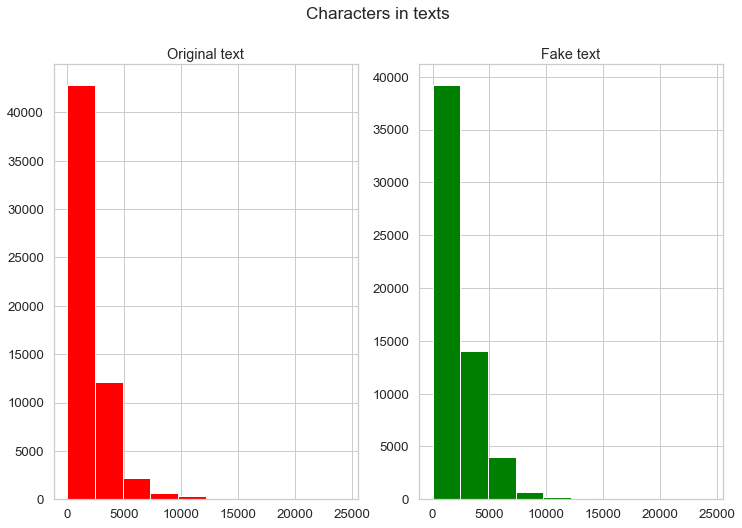

In [78]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df1[df1['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df1[df1['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

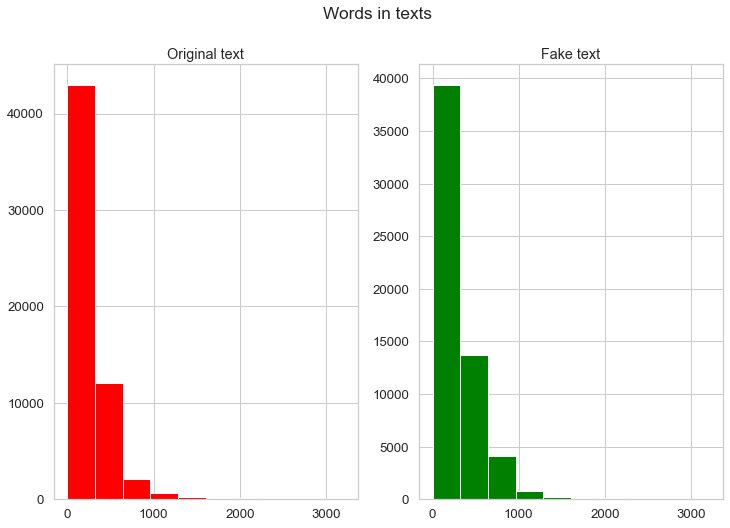

In [79]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df1[df1['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df1[df1['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

C:\Users\Drdr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Drdr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Drdr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Drdr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Drdr\AppData\Local\Program

Text(0.5, 0.98, 'Average word length in each text')

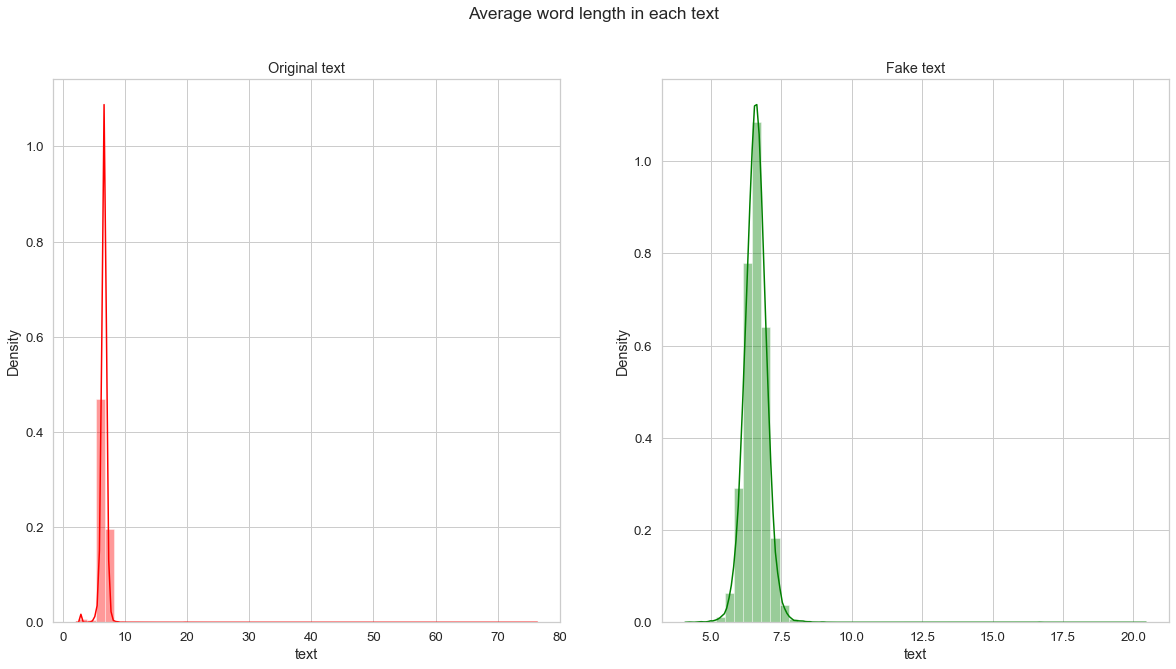

In [80]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df1[df1['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df1[df1['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [24]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df1.text)
corpus[:5]

['Graphic:', 'Supreme', 'Court', 'roundup', 'WASHINGTON']

In [25]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'the': 2828831,
 'to': 1608371,
 'of': 1397750,
 'and': 1235422,
 'a': 1206928,
 'in': 1006615,
 'that': 688743,
 'on': 525098,
 'is': 512202,
 'for': 511316}

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

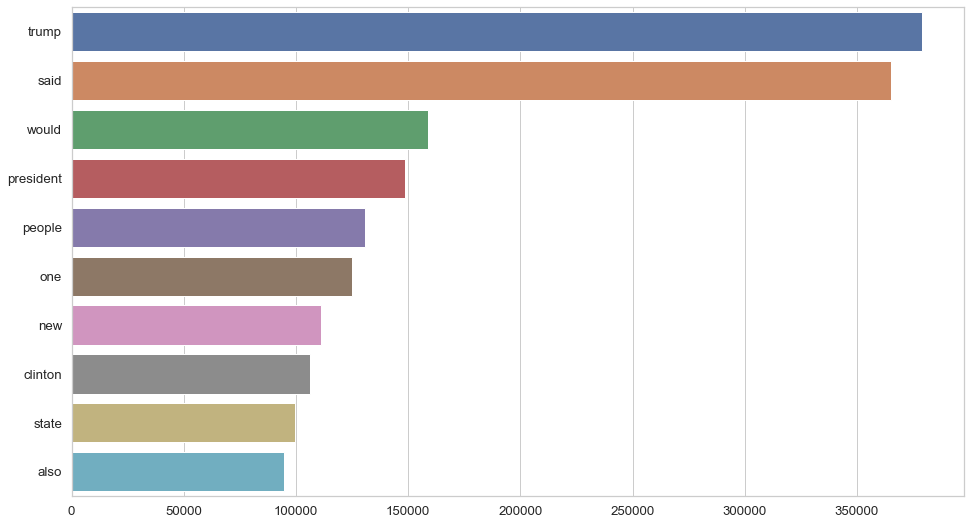

In [84]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df1.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<AxesSubplot:>

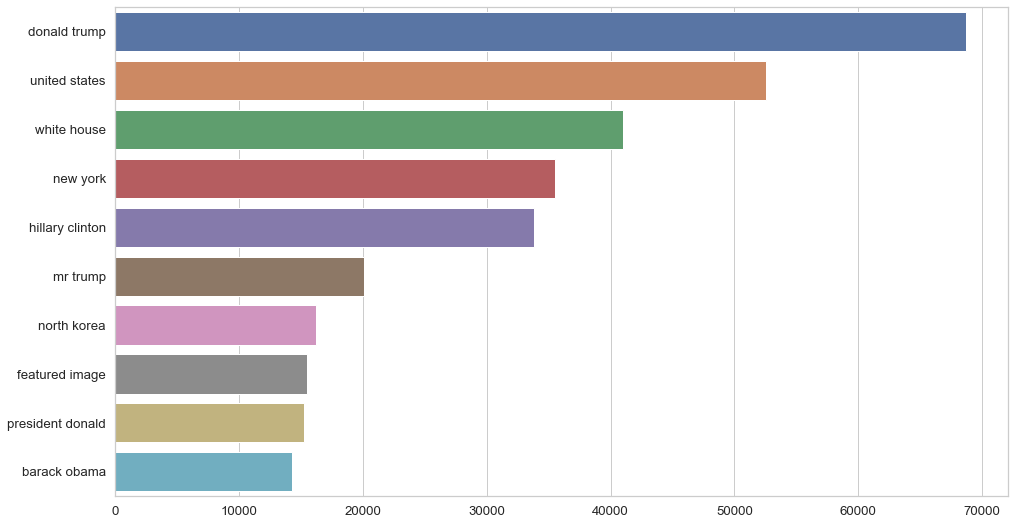

In [85]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df1.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<AxesSubplot:>

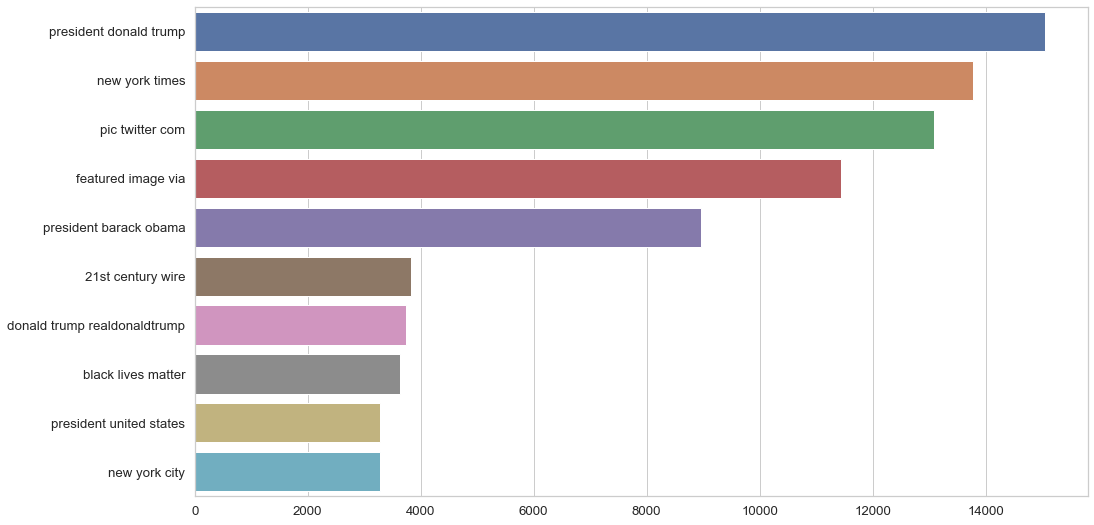

In [86]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df1.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

<AxesSubplot:>

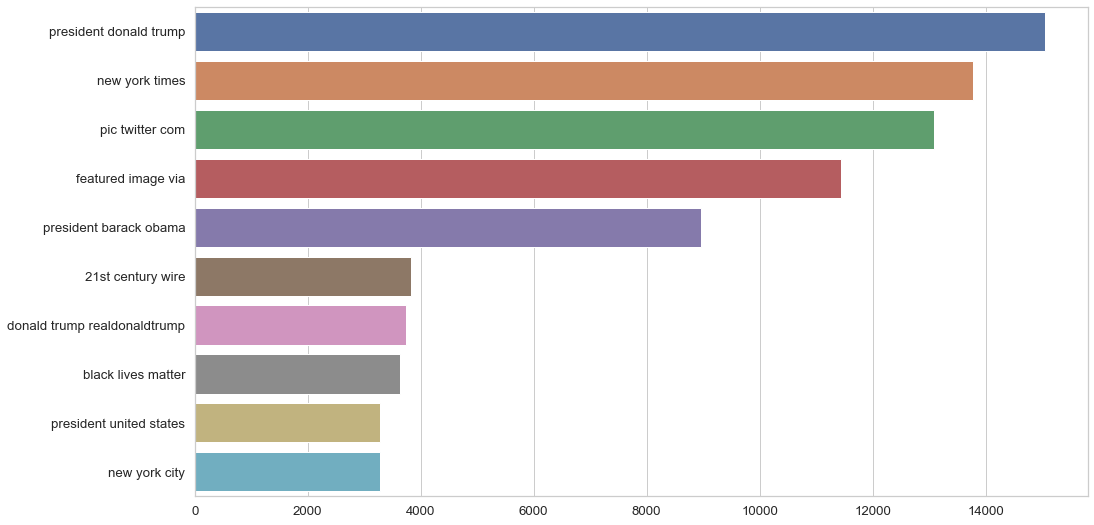

In [87]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df1.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [27]:
x_train,x_test,y_train,y_test = train_test_split(df1.text,df1.category,random_state = 10)
x_train

20873    CHICAGO (Reuters) - Illinois owes a handful of...
3375     Mere months after being on the receiving end o...
54531    JOHANNESBURG (Reuters) - Zimbabweans took to t...
21014    This Congresswoman has a potty mouth and a bit...
52227    Behind the headlines - conspiracies, cover-ups...
                               ...                        
48655    Comments \nA private group of technical expert...
5598     President Donald Trump should expand the econo...
49837    Ve la película de su vida y descubre que ha ll...
60699    As many of us are slowly (and sadly) coming to...
38311    Friday 4 November 2016 by Spacey People on ben...
Name: text, Length: 87673, dtype: object

In [18]:
max_features = 10000
maxlen = 300

In [19]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [20]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [23]:
EMBEDDING_FILE = r'C:\Users\Drdr\Desktop\PythonProjects\Fake News Detection\glove.twitter.27B.100d.txt'

In [24]:
file = open(EMBEDDING_FILE, encoding="utf-8")
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open('glove.twitter.27B.100d.txt', 'r', encoding='utf-8'))

In [25]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

#max_features = 10000
#tokenizer= text.Tokenizer()
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

C:\Users\Drdr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [26]:
batch_size = 256
epochs = 10
embed_size = 100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [27]:
from tensorflow import keras
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
336/343 [============================>.] - ETA: 4:12 - loss: nan - accuracy: 0.5063

KeyboardInterrupt: 

In [32]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 241s 229ms/step - loss: 2.7221e-04 - accuracy: 0.9999
Accuracy of the model on Training Data is -  99.99406337738037 %
351/351 [==============================] - 77s 219ms/step - loss: 0.0032 - accuracy: 0.9992
Accuracy of the model on Testing Data is -  99.91981983184814 %


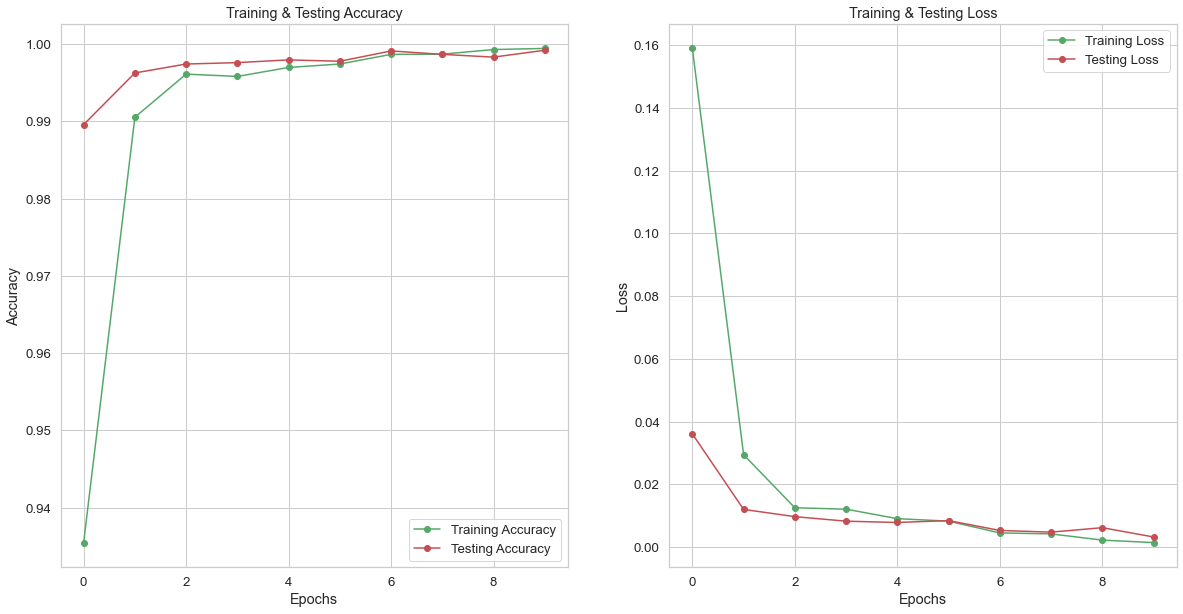

In [33]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [34]:
threshold = 0.5
predict_x=model.predict(X_test) 
predict_x[predict_x <=threshold] = 0
predict_x[predict_x > (1 - threshold)] = 1
predict_x[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [35]:
print(classification_report(y_test, predict_x, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5892
    Not Fake       1.00      1.00      1.00      5333

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [36]:
cm = confusion_matrix(y_test,predict_x)
cm

array([[5889,    3],
       [   6, 5327]], dtype=int64)

In [37]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(64.5, 0.5, 'Actual')

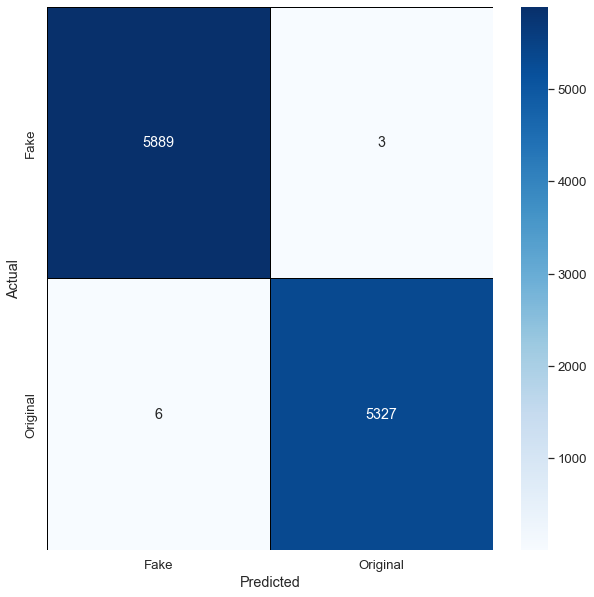

In [38]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [39]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


RuntimeError: The layer sequential has never been called and thus has no defined {attr_name}.

In [51]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

testing['text']= testing['text'].apply(str)
testing['text']=testing['text'].apply(denoise_text)

def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(testing.text)
corpus[:5]

['PARIS,', 'Oct', '3', '(Reuters)', 'Apple?s']

In [54]:
from collections import Counter
counter1 = Counter(corpus)
most_common = counter1.most_common(10)
most_common = dict(most_common)
most_common

{'said': 49,
 'would': 46,
 'Trump': 31,
 'U.S.': 24,
 'also': 21,
 'United': 20,
 'new': 20,
 'percent': 19,
 'one': 17,
 'could': 16}

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec1 = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words1 = vec1.transform(corpus)
    sum_words1 = bag_of_words1.sum(axis=0) 
    words_freq1 = [(word, sum_words1[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [59]:
x_train,x_test,y_train,y_test = train_test_split(testing.text,testing.category,random_state = 10)
x_test

7     WASHINGTON, DC?The American President Donald T...
5     2016 presidential election surreal record, it?...
18    PALM BEACH, Fla/WASHINGTON (Reuters) Millions ...
21    NEWSWATCH33 National Research Center commissio...
11    Next News Network host founder Gary Franchi br...
1     September 11, 2001, world changed forever. Eve...
2     WASHINGTON (Reuters) White House said Sunday c...
Name: text, dtype: object

In [63]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [64]:
#predictions = new_model.predict(testing, batch_size=10, verbose=0)
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [65]:
EMBEDDING_FILE = r'C:\Users\Drdr\Desktop\PythonProjects\Fake News Detection\glove.twitter.27B.100d.txt'

In [66]:
file = open(EMBEDDING_FILE, encoding="utf-8")
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open('glove.twitter.27B.100d.txt', 'r', encoding='utf-8'))

In [68]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

#max_features = 10000
#tokenizer= text.Tokenizer()
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    